## Ch03_Q15 in page 131 :Regression
This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [ ]:
!pip install ISLP

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

boston = load_data('Boston')
boston

## Part (a)
For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

Linear model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           5.51e-06
Time:                        23:55:53   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537

/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/267977022.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Get the p-value of the predictor
/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/267977022.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Get the p-value of the predictor
/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/267977022.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

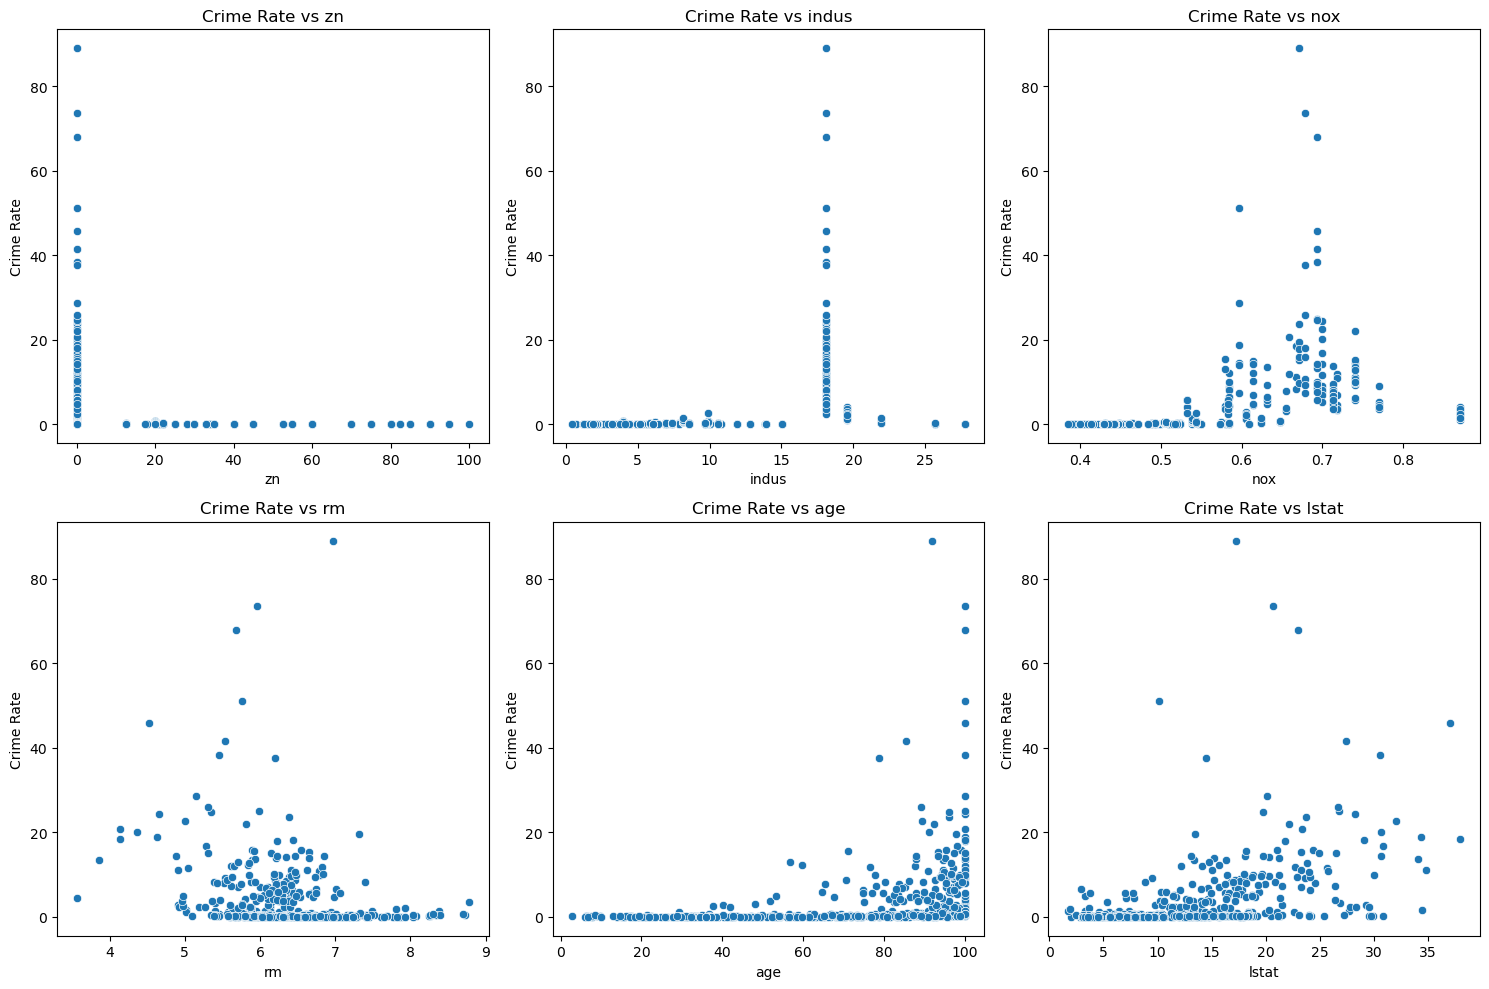

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fit and summarize a simple linear regression model
def fit_linear_model(predictor, response="crim"):
    # Add a constant (intercept) term
    X = sm.add_constant(boston[predictor])
    y = boston[response]
    
    # Fit the Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X).fit()
    
    # Return the model's summary
    return model

# Get all predictors except 'crim'
predictors = boston.columns[1:]

# Fit simple linear regression models for each predictor
model_summaries = {predictor: fit_linear_model(predictor) for predictor in predictors}

# Check statistical significance and print summaries
for predictor, model in model_summaries.items():
    print(f"Linear model for predictor: {predictor}")
    print(model.summary())
    p_value = model.pvalues[1]  # Get the p-value of the predictor
    if p_value < 0.05:
        print(f"--> {predictor} has a statistically significant association with the response (p-value = {p_value:.4f})")
    else:
        print(f"--> {predictor} is NOT statistically significant (p-value = {p_value:.4f})")
    print("\n")

# Plotting relationships between key predictors and the crime rate (crim)
plt.figure(figsize=(15, 10))

# List of selected predictors to visualize
selected_predictors = ['zn', 'indus', 'nox', 'rm', 'age', 'lstat']

# Create scatter plots for each selected predictor
for i, predictor in enumerate(selected_predictors, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=boston[predictor], y=boston['crim'])
    plt.title(f'Crime Rate vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Crime Rate')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## Part (b)
Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : β_j = 0?

In [6]:
import statsmodels.api as sm

# Prepare the predictors (all columns except 'crim') and response (crime rate)
X = boston.drop(columns=['crim'])  # Drop the response variable
X = sm.add_constant(X)  # Add a constant (intercept) term
y = boston['crim']  # Response variable (crime rate)

# Fit the multiple regression model using all predictors
multi_model = sm.OLS(y, X).fit()

# Display the summary of the multiple regression model
print(multi_model.summary())

# Identify significant predictors by checking p-values
significant_predictors = multi_model.pvalues[multi_model.pvalues < 0.05]
print("\nPredictors with p-value < 0.05 (statistically significant):")
print(significant_predictors)

# Predictors where the null hypothesis H0: β_j = 0 can be rejected
print("\nWe reject the null hypothesis for these predictors, meaning they are statistically significant.")

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        23:56:35   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

## Part (c)
How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/3151726191.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simple_coefficients.append(model.params[1])  # Coefficient of the predictor
/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/3151726191.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simple_coefficients.append(model.params[1])  # Coefficient of the predictor
/var/folders/5b/c6j65ym92k3142q_4xy3zc8w0000gn/T/ipykernel_66447/3151726191.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

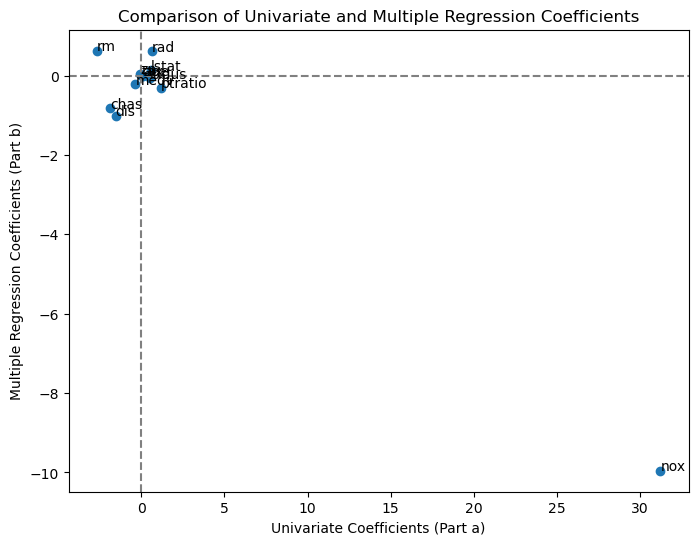

In [7]:
import matplotlib.pyplot as plt

# Extract the coefficients from Part (a) (simple linear regressions)
simple_coefficients = []
for predictor in predictors:
    model = sm.OLS(boston['crim'], sm.add_constant(boston[predictor])).fit()
    simple_coefficients.append(model.params[1])  # Coefficient of the predictor

# Extract the coefficients from Part (b) (multiple regression)
multi_coefficients = multi_model.params[1:]  # All coefficients except the constant term

# Create a scatter plot comparing the two sets of coefficients
plt.figure(figsize=(8, 6))
plt.scatter(simple_coefficients, multi_coefficients)

# Label the plot
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
plt.xlabel('Univariate Coefficients (Part a)')
plt.ylabel('Multiple Regression Coefficients (Part b)')

# Annotate points with the predictor names
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (simple_coefficients[i], multi_coefficients[i]))

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

## Part (d)
Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form  
  
Y =β_0 +β_1 \times X + β_2 \times X^2 + β_3 \times X^3 +ε.

In [8]:
# Define a function to fit a cubic model for each predictor
def fit_cubic_model(predictor, response="crim"):
    X = boston[[predictor]]  # The original predictor
    X_poly = pd.DataFrame()  # Create a new DataFrame to store polynomial features
    X_poly[f'{predictor}_1'] = X[predictor]
    X_poly[f'{predictor}_2'] = X[predictor] ** 2
    X_poly[f'{predictor}_3'] = X[predictor] ** 3
    X_poly = sm.add_constant(X_poly)  # Add the intercept term
    y = boston[response]
    
    # Fit the cubic model
    model = sm.OLS(y, X_poly).fit()
    
    # Return the model summary
    return model.summary()

# Fit cubic models for all predictors and display the summaries
cubic_model_summaries = {predictor: fit_cubic_model(predictor) for predictor in predictors}

# Display the results
for predictor, summary in cubic_model_summaries.items():
    print(f"Cubic model for predictor: {predictor}")
    print(summary)
    print("\n")

Cubic model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        23:57:58   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461 